In [3]:
import numpy as np

def lu_decomposition(A):
    n = len(A)
    L = np.eye(n)  # Initialize lower triangular matrix L with ones on the diagonal
    U = np.copy(A)  # Initialize upper triangular matrix U as a copy of A
    
    for k in range(n):
        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]  # Calculate the multiplier
            L[i, k] = factor  # Store the multiplier in L
            U[i, k:] -= factor * U[k, k:]  # Update elements of U
            
    return L, U

# Example from textbook
A = np.array([[2, 3, 1, 5],
              [6, 13, 5, 19],
              [2, 19, 10, 23],
              [4, 10, 11, 31]], dtype=float)

L, U = lu_decomposition(A)
print("L:")
print(L)
print("U:")
print(U)


L:
[[1. 0. 0. 0.]
 [3. 1. 0. 0.]
 [1. 4. 1. 0.]
 [2. 1. 7. 1.]]
U:
[[2. 3. 1. 5.]
 [0. 4. 2. 4.]
 [0. 0. 1. 2.]
 [0. 0. 0. 3.]]


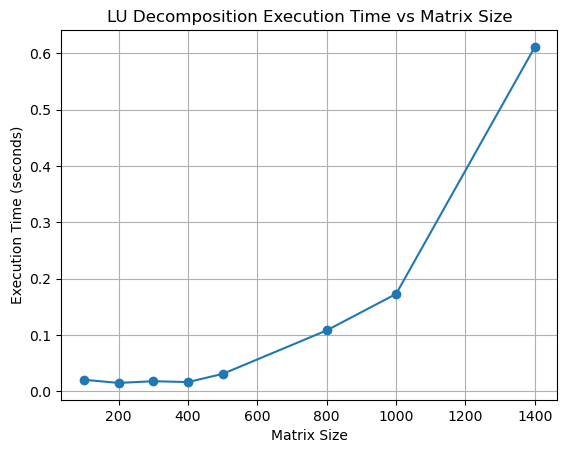

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)  # Initialize L as an identity matrix
    U = np.zeros((n, n))  # Initialize U with zeros
    
    for k in range(n):
        U[k, k:] = A[k, k:] - L[k, :k] @ U[:k, k:]  # Compute elements of row k in U
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ U[:, k]) / U[k, k]  # Compute elements of column k in L
    
    return L, U

def benchmark_lu_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)
        
        start_time = time.time()
        L, U = lu_decomposition(A)
        end_time = time.time()
        
        execution_times.append(end_time - start_time)
    return execution_times

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500, 800, 1000, 1400]

# Benchmark LU decomposition
execution_times = benchmark_lu_decomposition(matrix_sizes)

# Plot execution times
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('LU Decomposition Execution Time vs Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()


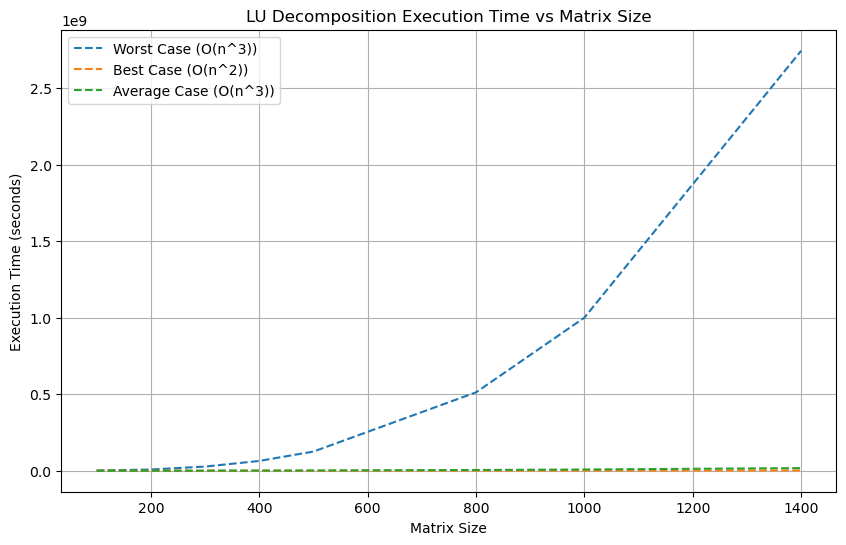

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)  # Initialize L as an identity matrix
    U = np.zeros((n, n))  # Initialize U with zeros
    
    for k in range(n):
        U[k, k:] = A[k, k:] - L[k, :k] @ U[:k, k:]  # Compute elements of row k in U
        L[(k+1):, k] = (A[(k+1):, k] - L[(k+1):, :] @ U[:, k]) / U[k, k]  # Compute elements of column k in L
    
    return L, U

def benchmark_lu_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)
        
        start_time = time.time()
        L, U = lu_decomposition(A)
        end_time = time.time()
        
        execution_times.append(end_time - start_time)
    return execution_times

def worst_case(n):
    return n**3

def best_case(n):
    return n**2

def average_case(n):
    return n**2.3  # Example, actual average-case complexity may vary

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500, 800, 1000, 1400]

# Benchmark LU decomposition
execution_times = benchmark_lu_decomposition(matrix_sizes)

# Calculate theoretical complexities
worst_case_times = [worst_case(n) for n in matrix_sizes]
best_case_times = [best_case(n) for n in matrix_sizes]
average_case_times = [average_case(n) for n in matrix_sizes]

# Plot execution times
plt.figure(figsize=(10, 6))

# Plot theoretical complexities
plt.plot(matrix_sizes, worst_case_times, label='Worst Case (O(n^3))', linestyle='--')
plt.plot(matrix_sizes, best_case_times, label='Best Case (O(n^2))', linestyle='--')
plt.plot(matrix_sizes, average_case_times, label='Average Case (O(n^3))', linestyle='--')

plt.title('LU Decomposition Execution Time vs Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
